<a href="https://colab.research.google.com/github/pumpzcc/EvolutionaryDeepLearning/blob/main/EDL_12_5_Genetic_Plasticity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Scenario Imports
import numpy as np
import random
import matplotlib.pyplot as plt

import os
import time
import cv2
import urllib.request
from IPython.display import clear_output

In [2]:
#@title Image Helpers
def load_target_icon(icon_url, size):
  icon_path = "target_icon"
  urllib.request.urlretrieve(icon_url,icon_path)
  target = cv2.imread(icon_path, cv2.IMREAD_GRAYSCALE)
  return cv2.resize(src=target, dsize=size, interpolation=cv2.INTER_AREA)

def show_icon(icon_arr):
    plt.figure(figsize=(5,5))
    plt.axis("off")
    plt.imshow(255-icon_arr, cmap='Greys')
    plt.show()

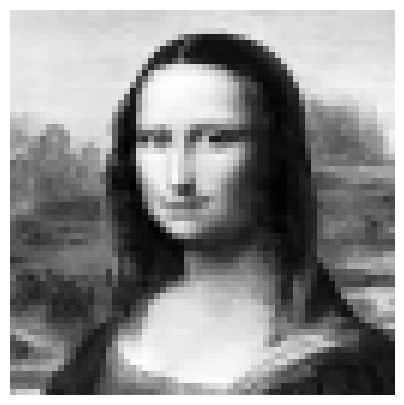

(64, 64)


In [3]:
#@title Select the Target Image/Icon { run: "auto" }
target_icon = "Mona Lisa" #@param ["Mona Lisa", "Wolf", "Trash", "Happy"]
size = 64 #@param {type:"slider", min:16, max:64, step:1}

target_urls = {
    "Mona Lisa" : "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZgVzl5ashVmS9cFLqcoAJT6SxCMxWlgbJOw&usqp=CAU",
    "Wolf" : 'https://www.clipartmax.com/png/middle/235-2350420_other-wolf-icon-16x16-images-loup-icon.png',
    "Trash" : 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAAAeFBMVEX///8AAABZWVmgoKCnp6fm5ub29vbFxcWRkZEqKiotLS1VVVW9vb2srKzV1dVERERMTEzLy8uzs7NkZGQ7Ozs2Njby8vLc3Nybm5uEhIQaGhpqampGRkbW1tbq6urOzs55eXmNjY0LCwtfX19ycnIbGxt+fn4jIyNwDIdUAAAFMUlEQVR4nO2d63aiMBRGi1zsBbQ6IlKt2uro+7/hoHZmdfiiJiE37bd/zoLM2ZWQ5CQkDw8WydJVPi6KJEniMyRJMe5XU5tB2CMbz/eRJK+zyne4yizrJ1m9E73cd8hKpDs1vSPl2HfY8sw0/A4MV74jl2Mw1BRs+Mh8Ry9Bou/XsEh9x3+VeSfBhsCf1Gmvq2AUBf3CyV67C0ZRyO2GgV/wQN+3x1k618G/hNrD6fYW/c4kzEZjYEwwina+ZURkHRp6JMSqaO4ZPfDkWwfJjApGUeJbCDD7E0bRW3AvmzPDwc+Xj6K/GrxX6YnqxPugYTXq5/FuckYx9m3UIhdGuY+X128diTtCobUYG1GQa8kETCFUHNmNWJHlmyDER+nbVyLD2mK86ogeUpUIRb2FZ2vR6rAV1COlAkSv4qB6p8+dq9ELllDYiVWLJYbXUyyij0VsrcSqxwjDUx7GYrsYUkXEWvSpnKl/xDJshKoJRveqXIagxZDoLrgCU9zybeE/0DCgzCKmLzQSZmgYUHOBfTaNfBl2i4I21Bij4+iEhibJLiLIk+aX7xAVgoaDa7eYII3Xm5fFcFJOni/wCcHtL10uBsqIni5cXTYhDV9787pbzirTmel0TdnBsfrtO3o5NBrfr1+w9B26LLqjEN3JavfoJuZu5ifUnXOsfIetgN5Qcuw7bAVKLcPbqYYNWoa176hV0BpKrn1HrYLWUPL+DQU50HDRMjS27sAFNKRh+KgY9svhgcXiRoZOJyaLY9TDjYSheDb3VpDpvtEwbO7fUGZeloZhQ8OfYSiYUL8hFjT8EYaCdRU3hMz6AeEas5vhhYY/wvDdd5CdkFlstqwb1tv1vGHTOwAzvIueHzYwKB8e//1XE+p2vd01gevNs8EclLfVu7CA0dBHYOEYwopwQ1/y0dAdNNSFhu6goS40dAcNdaGhO2ioCw3dYcsQvkiCUVk2aIFr0N/bl8Aqpmn7Cpy5XlyNRA/YSgDKhRzrW/uKtH1F9NG+JG5fgZnB65E4M4QNA9AQli7D52GYVaIhDWlIQxrSkIY0pCENaUhDGtKQhjSkIQ1pSEMa0pCGNKQhDU0ZOps/hJlXV4bX52r1uD637MgwA0NDW7fTkIY0pCENaUhDGtKQhjSkIQ1pSEMa0pCG/xvCvu00pCEN79cQttegIQ1pSMOuwDk54Rga+pqVhjSkIQ1pSEMaBmQ4heP17s5wT0Mayhomd28Y05CGNKQhDWlIQxrSUN8Q9mS/N8PlmyXDTSiGUzBcmTH81S53Fozh4M4M8Sml4a0Z8imlYfiGfErNGUJwrgzhTB8a0vCcIWzj7GgvaHeGNfzXeQtY55K1r8hhy++0fQV0q/HP5MzQETTUBgzXZspVpqKhLj/QcG6mXGUGd2+Ix2vaMtyYKVcZPObWlqHMYZ82wAO1bRnKHCtsA3eGZWamYFUKZ4YRngDjhJ07Qz8vU2wsTBlusWTI6ztgCev2ogjPJNICK7ggVWOdSiAoc864FJAAaugZ+vPJAuPjA3rnGwuYiUqPhvNtXdePB2Yn4m8khSLfb/4q71j2x+GEaZj+OmFK8GEqLt87Bsepc98uYgxWFMF7OgCMtlmCBsM/Rt91S982AiAd2Q1I13rn2XTnGLtunjHeHmewO6pfDJ1e+R1Rt9AfVjrGKXzP4Q9L3eIMPgj2hYVH9Etx7VvtyN7Q981CRAMp18ynFgWb943vn7E0tP3zBVKfPbjS2IjwItUMdjNywzx3l+RLR+MiiR2SFHmlV//+AF5Ms0xZGeWpAAAAAElFTkSuQmCC',
    "Happy" : 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAAAilBMVEUAAAD8/vz///+1t7XLzcspKik2Njb5+/mpqqnx8/Ho6uj3+ffb3duhoqHi5OJsbWx+f37Bw8G6vLp5enmXmJdzdHPNzs1UVVSjpaPm6OYWFhYgICCMjYyGh4ZMTUxcXVxERETW19Y9Pj0oKCgODg5BQUFnZ2eLjIswMDAbHBtPUE9aW1oUFBQiIyKCZkikAAANTklEQVR4nO1dZ5faOhBdC4NNM3UpCXULYbPJ//97zzZdM5JmZNkW7+R+yDkbsKyL2mjqy0sVeG82m++bOO5/NW84VvLq0nH4ns7CUKAIU8wa823dfbTGbjhbLk9cAhQXpklntX66Af3uJ4GGG2QaBPv+ru5eU/E2DqncJJ7t8aRZd++NOMSJBbsbyWjfn9fNQYP5om1P724op3UTwfEWR4XpXUmGw4+6+chYh27Y3UiOXuvmdIfWuOOU35nkclA3sTM+xo5mJ+SY+LAiB8ty6J05isWPevm9JiXyO5EM4vf6+DXHZfPLOUZxTfx+VMIv5ygmdRBsVMUv55hUfnasOzx+6PWJ9fzys0p+Lfr5fibTSDE9tk44TrM/GwmLpwjGPysjuAoo3cp63+32pitNS7/703HUJfIU7WE1/DZdQneyi+3+ldij4WuypJBMRblyqeX46Ju7kkmVQ+YlaL6aEUiKduk7zjYx9CKbcfHmy6btr21snK9C7F1TesTA2IF2XEiz9DpuG19R5hV5rH15tmU6uA6s93qOIijt/N/NdG9Oh2/oSGNmOozE2M17ZGx0rxWOt/L0QNK9rdty+bIzFtrxG+1cv2+qW5Ci++36fbolWAa/DClHzY/ad/w2NUFRzpTJoROe3FJsqd9Usii1Uk9VlxRbkeo1QqzdvQbFbqTkKPpWggWCpopgKmBUYFGZKC9qouNGq3pUEuxUpO5TDqPouGheNUVT8bMyvfRAtauKdvHGVSNYrXXhvaEcxaI/s2oNiqhiO9hUsZ2LTrHtRjlFG446TsenqiuFDg0FwRKlex3CEijiM0MEG2e9ZkGxGAtQxEU10auJ4MvL1jFFBcGZ007zsMVPRmG3rx/wxkLHneZh00N7ZSX8b3CCdVlJrkBVYaJr0RI6H4QHDkw4Rb5iY4+2cyihx2ygE5U9udZoK54Y1vG1yFMyDlCC9W4yd8AmqhCsJvwmqKDI0YajDXhEEJ+ojFNx5T1BBcU34sNfiPmsVkkGBcaQanxDDgrmMq4CmIwqaHo/VJipTdhWY4AwbJMM4dhv48lB+IgRMtcoog32XPU3ehIQWxhhLHbIUw4UWuUAk53/mh5Ctpmu8aG6sIngcCwMzwyRIfRwl7kgRrpreARq0J2bsZxiCfurv2TAIRRJzQ6eevzkDiLUnvtw59VhCnvc03wdquvq11qYgKwr9aC04IgnFfbVDi3OICJD6FNIgALIPFUN4hf8ahWecoUBDkXlIEINsCjNB8El4HVWMYg/4BdL8j1yDSCHKfZHZD57fRTeMIeHImpUBGeh0Hn3egXaIAINqRs3gEoAL+0R4iQC9Gulu8o4BBxEeMy9ge94eytEAFYiIqqAq/0zDSE2iGCXhPtMHR21xm/QffmkA2v1Wc7CC+AgGr/gyiuuIoDTXNadPvsQvnzIy0ySqYFoV+el4tvKwxlslY9ngWznsLgXTsKklyKZ/rbp37WVfW8pRC/5xfZJ2kkEHw3WLfkCwr3a/x1Ft6C7ru058zmLTkEz2b8drgcJmKb3xiTgWBLxYm8fHUBtOTakVjq8cQQr7d6IId8MtcocAOjEK8SS1bkM0DOfGePUBM/fTVP5rGDdKl4x3broMhfSFG2lzXE/AON0Ow+gTMpo91XlQszajeHl9NwKY9+SFeB32yVonuFh9K2OFmAQRIwJl1aoluv0SFQPFBhexk6qjkcUS7KK4F0dHcMxr4PFdt3wAHe6Akrh1Xpqhmzx0EX9MWLx5bl4dc4A7kF0/Qzu3ndB+w+tFcVSPneGrmqAF4zzB32ZOt2xRBuRSHZw0Ufe0qfCBzi2zo78skTHsNpru5aC1MinvhXGIMo/1WUhgibJh5Bij7+1RDJcoV6C962QY8fkLfnypNwgXaDBnQTvmiJNMN1ulbdC3msAw9Pwyz8h416h7xnVicM01en7wpd0gzhTmShPESOgo4AMJwzpPzm4I+ULTjaF2097iKhihuBEzDcCeQPC1MU4TFtEUPkYAoaZcAwObbpQ+sfEj9Y3hwzBistkPuDjR5pZJ5jWIe3INzJkGFAw4UVmyIk/0YWT522ZHJRyGJOJMK6a2BjKKn8OQ1neA33bUVpZmFpheEZ25WePyNWJ4QP1buobqRVwAZdB7xBwthBNKFGwXIT0+bCoamU0euXWCsftjMSQ0Z7+3pM3TwFipbbtEGD4VZCh/gZMtgzoBpHnOQgOxFVRhpo1xIgnUyt7uNp3WaWYKWSKMVTLNYK2kZ6AxzrmPxMva4PsA4YwZPt0q4JzeY63ylaY/sllMMQ7x85XhbfS5RovSmGYboWgdyxN7gkHpBX6JeCCchi+7ELJpmIVQ/Tde+QoxIifOaUkhukFJbykksvzcVtmVPvei7tmxnRt9w2lMXx5+ZyOc+Nhb7QtkKJyMxh1chPkaGfDr1SGnuAfw38M/cc/hv8Y+g8CwyfzSZTx/2dYwv3QM7i/4/sG93oa34Dp2oroS/0DxrCIzts/YDrvInYL/+Da9uQfMNvTH9mAZJM2yxcA16BcnSJbufnqH3+A2oDhZlpRFYkygJuZgBPKU4UDPQJspblOrIA/jW9Q+NMU8InyDcBR4ewBEMgUfa6xqAWQaM5bSgHfRM8AAmPOW0oB/1K/ALMHnf1LC/gI+wUYYnj5BHzwFIkGIMBpeBWxi/jq+wS1r36ReAuPoIm3gDEzhSLsyoPe918TMwOHV3/Pn9Z0nAz0gUbAUfbO2wUsRH0s/kenUUOCs2OozyWjjV0Dzh4m169Ou/KMwgtTrN4vmcR9/CE7hnQrxLJSjpO20TdAG0PKjwM+ZCXIKrsqv42EUdCCcsvDEPBjudMGRVANx89RZto3rXxDLDcUa4xhrpkGS4hx6ZVYjlmQsdmFDKT8knNcgQSEZtk0V9KJkrfVY3iK7TbKkXAWSsoYc+YMiHzmZ+uxNDH2cCo5TPGRk/UX0DoBI6nNa+zsqJWux1JEgMm5tpwIzR46hBGC+WkI/q/b3sWDKSF55TNwq9hOuq4S8tNA2ZQU5XA5ZrLiqltn6VCag1tFcxJBSo4h2yRDt5NUiHboJF/I67578+GjaW8peaKAnooaqrK+603mkFaMZHPVvaOXtkiSnGi5vqzztR0eQhIy573G3OqUfD80Oo/VcqmKTWLSPTCIVH3ND+kFmQNm2JizzpDtfDSTiwELqqEPbKSKnHvIIFLDCaZyJv7cgzKZTSiLaLee7JdIqWPRpjpgwqFRjD2SvpQ6Dm8zJHFH1usoEtO+6iR5X/QXIsILrAu6tR3JfanIUgSzDjPyl66VcWxCC9VDHXrlOnr+0oI5aMfkUvdGCE5AHgzbUd/fkZS8HDtUU10ylMkvZkjzrDzCWDpvlur03QFHwfQdZOWCdpDP+7XYXE23JuZtjJnP20VO9jd7jqkAz9UasHOyO8mr32x0LUhmCcz4Eh87r76r2gifMx7JTAxaWSh9LGojQBEvCLpWRVUH2Q2BxDITZe0y9dnUt0BrlFjmLT/uGiPNoX5hJ0YD2woaVjVKXNeZ+R3HsgRzL9L04wJKHrs6M2iKg6hgmZLNr2HSSbE8ZUTMsVivCmqwbGsFYdmtnFWP3RwOB1daK/t6T+gG5Z/ncIGaXc9Rdw2L4adviU9aO4+TgfxJ6x9yRCLsDPOJYuEaloo6pN6sRQd1SBW1ZD0ZRRe1ZFX1gL0YRbweML+gPV7T2YNRdFXTWVWXu3aK7upy+1lbfYArLa1qq6syw9a6Frf4XUylATZCQbG+UcRk0cBG0XKFgmJdNR9VSWyKRNtFOMWAvzU7gCInVbFwwhZOsY6I709VVwrGSzZV7UZW6il7KPYYB9EhRxVFdoKjInhXLMFAdIgZtTVQTtQKY2sUpyDvSqiGahR5NrAiUNp7XBVOU63F7EpWgXMiLJ9xfX3syoNHNVGzc6PsmkI7tcHOZdT5mzqxoWiXGpCpMUg6DqtXVy8QJXJcBWqTgPO8AZoCDUKMdo7fluHPXJPEV3TdJ0ZY6H5PMXI+jtO2xqYjojJ8Wjc6K5LruZrOT93bZiU57Wqz4QrRaTiS5FqhwSRX3gauq5aScQz2xWWAt/XewK/Um83AYNVNJ2tcqBj7YBmZXtGzvdATkRg5ChHb3ZA/+rHRLs6s42WFFWKZgiMZDnkK2rfNKCSY/UW7iqqFX/r029eRTPavtO11PlkkEcWrQVRWg1knajyy7EbxVNur/rTTNXkzXBtsVxefbNrOJZ7p4mkg0PtfgoaCaqOT1/p88zhPmmupooHlZ6UEXzLvKWfupASCSR11UX84dJk18KtKmQDQHJO2nKL8ojrTA/w2CQDF+QUxryaqczRLnatCLDzI0fFnzNwX6fS6viRTbaVnh3OO6fngVZ6cjSM//Ss90fAuc8XHr8DRbE2bCYelR1BbYb5oFyaZLr7ZqnLxhYFDvLcnmcVJ7QcF0vJXhNZ6TPXwfmQn2o3W82Q0XDRUQWkoNxEk/SfMKrqe9JYdzT3i/NGy01/v6u5rAWy3h1kY7rHbU5j+/3xbeRqYknBspvg5jHMM/mZ/VbTk/gPQmaTgDLt5jAAAAABJRU5ErkJggg=='
    }

target_icon_url = target_urls[target_icon]
target = load_target_icon(target_icon_url, (size, size))
show_icon(target)
print(target.shape)

In [4]:
#initial population
population = 300
genes = size*size
generations = 10000

pop = np.random.uniform(0,1, size=(population,genes))
print(pop)

[[0.43227358 0.84053322 0.29678796 ... 0.82196563 0.4535058  0.18447781]
 [0.58085159 0.22891173 0.94728137 ... 0.95281443 0.09769042 0.48074131]
 [0.90390251 0.24898742 0.64643722 ... 0.61665628 0.46957068 0.896411  ]
 ...
 [0.48383274 0.21196579 0.08545286 ... 0.91308727 0.67004345 0.6768556 ]
 [0.38762713 0.61454505 0.69012851 ... 0.28341841 0.85737296 0.12849002]
 [0.13335499 0.83450784 0.49923433 ... 0.19185738 0.92695419 0.49814001]]


In [5]:
def render(individual):
  return np.reshape(individual, (-1, size))

def fitness(individual):
  """Calculates Mean Square Error Fitness for a render"""
  fitness = (np.square(render(individual) - target)).mean(axis=None)
  return 1/fitness

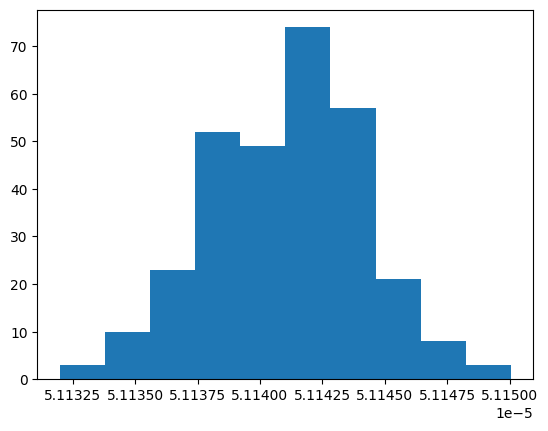

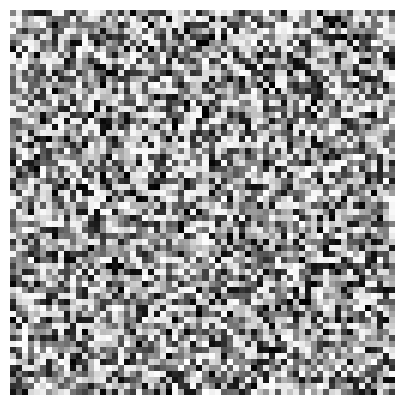

In [6]:
def evaluate(pop):
  return np.array([fitness(ind) for ind in pop])

plt.hist(evaluate(pop))
show_icon(render(pop[0]))

In [7]:
def elite_selection(fitness):
  return fitness.argsort()[:-2][::-1]

parents = elite_selection(evaluate(pop))
print(parents)

[212 280 126 223  34 159  18 156 112 171  10  60 184 149 231  38 292 187
  23  14 263 219 266 282 213 256  15  26   0 247 230 252 222  51  40  89
 275  25  50 191 204   6 261 127 286 217 160 259 206 119  84 274 201 181
 299   8  73 224   9 137 278 145 151 226 102 168 203 281 243 257  30 298
 296 173  88 246 228 262   4  28  90 240  53 279 167 180 194 273 142 291
  20 118  59  36 103  95 270  67 176 254 236  97 107 288 255 232 162 200
 164 277 108  68 193 124 225 122  22  39  79 272 101 116  76 293 235 157
 104 143  47  85  27   1 199 242  81  91 146  19  70 174  83 183 285 144
 113 134  12 205  94 196 198 197 202 189 284 109   2  71 153  62 195  75
 138  92 268 244 218  86 110  49 120  65 188 132   3 135  82 179 239  11
 220 170 276  93  63 186  54  13 264 131 172 185 209  96 165 115  56 215
 117  58 123  87 216  55 211  37 111  16  98 227 139 294 169  33 250  31
  43 245 248  69 229 290 190 214 271 166  78 289 163 150 136 147 141 253
  35  74   5  41 125 238 297 178 251 208 182 267 14

In [8]:
def crossover(parent1, parent2, crossover_rate):
  # children are copies of parents by default
  child1, child2 = parent1.copy(), parent2.copy()
  # check for recombination
  if random.random() < crossover_rate:
    # select crossover point that is not on the end of the string
    pt = random.randint(1, len(parent1)-2)
    # perform crossover
    child1 = np.concatenate((parent1[:pt], parent2[pt:]))
    child2 = np.concatenate((parent2[:pt], parent1[pt:]))
  return [child1, child2]

crossover(parents[0],parents[1], .15)

[np.int64(212), np.int64(280)]

In [9]:
def mutation(individual, mutation_rate):
  for i in range(len(individual)):
	  # check for a mutation
    if random.random() < mutation_rate:
      individual[i] = individual[i] + random.uniform(-.1,.1)
  return individual

mutation(pop[parents[0]], .5)

array([0.80545017, 0.17007068, 0.08345613, ..., 0.87139107, 0.34804323,
       0.63500745])

In [10]:
def plasticity(individual):
  original = individual.copy()
  f1 = fitness(individual)
  indvidual = mutation(individual, 1.0)
  f2 = fitness(individual)
  if f1 < f2:
    return individual
  else:
    return original

plasticity(pop[parents[0]])

array([0.80545017, 0.17007068, 0.08345613, ..., 0.87139107, 0.34804323,
       0.63500745])

In [11]:
def simple_GA(pop, crossover_rate=.5, mutation_rate=.05):
  parents = elite_selection(evaluate(pop))
  children = np.zeros((population,genes))
  for i in range(population):
    offspring = crossover(pop[parents[0]],pop[parents[1]], crossover_rate)
    children[i] = mutation(offspring[0],mutation_rate)
    children[i] = plasticity(children[i])
  return children

pop = simple_GA(pop)
pop = simple_GA(pop)

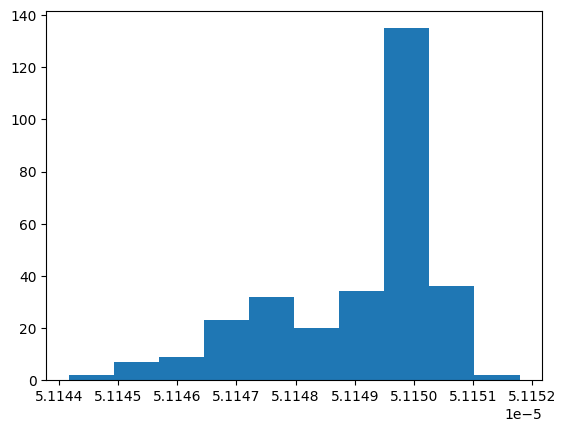

Generation 1
    Max fitness 5.1151781392926294e-05
    Min fitness 5.114416695426566e-05
    Mean fitness 5.1149046362467916e-05
    Std fitness 1.4058652178168667e-09


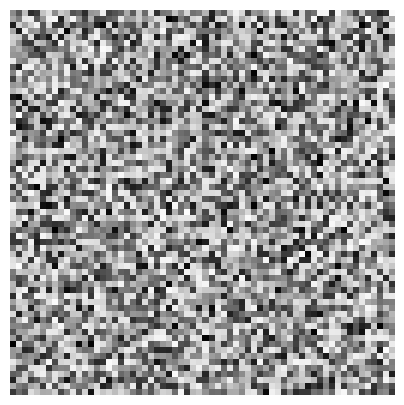

In [ ]:
#initial population
pop = np.random.uniform(0,1, size=(population,genes))
render_gen = 100

for i in range(generations):
  pop = simple_GA(pop)
  if i % render_gen == 0:
    clear_output()
    fit = evaluate(pop)
    parents = elite_selection(fit)
    plt.hist(fit)
    plt.show()
    print(f"Generation {i+1}")
    print(f"    Max fitness {np.max(fit)}")
    print(f"    Min fitness {np.min(fit)}")
    print(f"    Mean fitness {np.mean(fit)}")
    print(f"    Std fitness {np.std(fit)}")
    show_icon(render(pop[parents[0]]))
    time.sleep(1)